<div dir="rtl" style="text-align: right;">
<h2>مثال برنامه‌نویسی: مجموعه ماندلبروت (رویکرد نامپای)</h2>
<p>در این درس، به دو رویکرد نامپای برای حل این مطالعه موردی نگاه خواهیم کرد.</p>
<h3>راه‌حل ۱: پیاده‌سازی نامپای</h3>
<p>ترفند این است که در هر تکرار، مقادیری را جستجو کنیم که هنوز منحرف نشده‌اند و اطلاعات مربوط به این مقادیر و تنها این مقادیر را به‌روز رسانی کنیم. از آنجا که ما از <em>Z = 0</em> شروع می‌کنیم، می‌دانیم که هر مقداری دست‌کم یک بار به‌روزرسانی می‌شود (وقتی برابر با 0 هستند، هنوز منحرف نشده‌اند) و به‌روزرسانی آن‌ها به محض انحراف متوقف می‌شود. برای انجام این کار، از اندیس‌گذاری پیچیده نامپای با استفاده از تابع <em>less(x1,x2)</em> که مقدار منطقی (x1 < x2) را به‌صورت عنصر به عنصر برمی‌گرداند، استفاده می‌کنیم.</p>



<p>   حال بیایید این روش را در کد مندلبروت جایگزین کنیم.</p>



<h3>راه‌حل ۲: پیاده‌سازی نامپای (سریع‌تر)</h3>
<p>در این رویکرد، جزئیات بیشتری برای بهینه‌سازی وجود دارد که در درس آینده مورد بحث قرار خواهد گرفت.</p>
<h3>تصویرسازی</h3>
<p>خروجی این کد می‌تواند شبیه به تصویر زیر باشد، که به شما کمک می‌کند بازی زندگی را مصور سازی کنید:</p>
<div style="text-align: center;">
    <img src="path_to_image_widget" alt="Visualization of Mandelbrot Set" />
</div>
<p>بخش جالب (و کند) این کد، تابع <em>mandelbrot</em> است که در واقع دنباله <em>f<sub>c</sub>(f<sub>c</sub>(f<sub>c</sub>...)))</em> را محاسبه می‌کند. برداری‌سازی چنین کدی به طور کامل سرراست نیست زیرا بازگشت داخلی نیاز به پردازش متفاوت عنصر دارد. پس از انحراف، دیگر نیازی به تکرار نیست و می‌توانیم به طور ایمن تعداد تکرارها در زمان انحراف را بازگردانیم. حالا مشکل این است که همین کار را در نامپای انجام دهیم.</p>
<p>در درس بعدی، این مثال را با استفاده از رویکرد نامپای حل خواهیم کرد.</p>
</div>


In [ ]:
def mandelbrot_numpy(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
  X = np.linspace(xmin, xmax, xn, dtype=np.float32)
  Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
  C = X + Y[:,None]*1j
  N = np.zeros(C.shape, dtype=int)
  Z = np.zeros(C.shape, np.complex64)
  for n in range(maxiter):
    I = np.less(abs(Z), horizon)
    N[I] = n
    Z[I] = Z[I]**2 + C[I]
  N[N == maxiter-1] = 0
  return Z, N

<div dir="rtl" style="text-align: right;">



<p>   حال بیایید این روش را در کد مندلبروت جایگزین کنیم.</p>



</div>


1 loops, best of 3: 7.84 sec per loop


/tmp/ipykernel_5166/923299986.py:74: RuntimeWarning: divide by zero encountered in log
  M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z)))/np.log(2) + log_horizon)
/tmp/ipykernel_5166/923299986.py:74: RuntimeWarning: invalid value encountered in log
  M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z)))/np.log(2) + log_horizon)


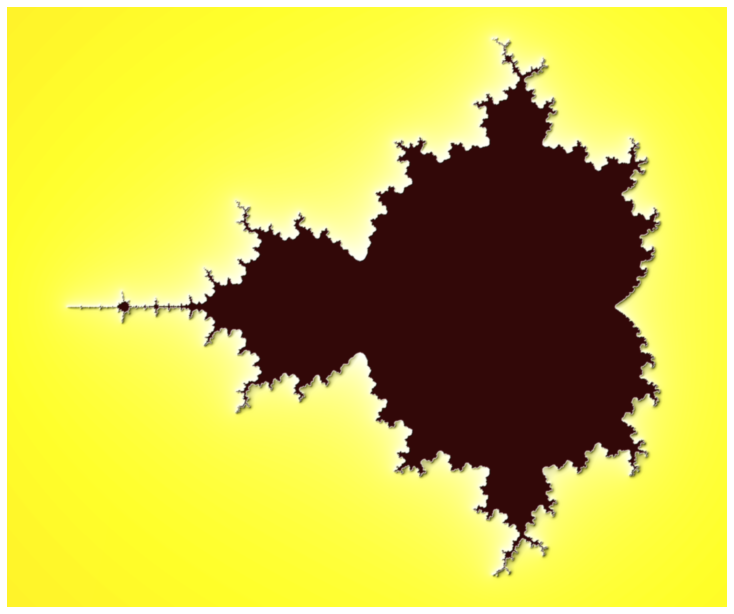

In [1]:
# -----------------------------------------------------------------------------
# From Numpy to Python
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def mandelbrot_python(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    def mandelbrot(z, maxiter):
        c = z
        for n in range(maxiter):
            if abs(z) > horizon:
                return n
            z = z*z + c
        return maxiter
    r1 = [xmin+i*(xmax-xmin)/xn for i in range(xn)]
    r2 = [ymin+i*(ymax-ymin)/yn for i in range(yn)]
    return [mandelbrot(complex(r, i), maxiter) for r in r1 for i in r2]

def mandelbrot(xmin, xmax, ymin, ymax, xn, yn, itermax, horizon=2.0):
    # اقتباس شده از
    # https://thesamovar.wordpress.com/2009/03/22/fast-fractals-with-python-and-numpy/
    Xi, Yi = np.mgrid[0:xn, 0:yn]
    Xi, Yi = Xi.astype(np.uint32), Yi.astype(np.uint32)
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)[Xi]
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)[Yi]
    C = X + Y*1j
    N_ = np.zeros(C.shape, dtype=np.uint32)
    Z_ = np.zeros(C.shape, dtype=np.complex64)
    Xi.shape = Yi.shape = C.shape = xn*yn

    Z = np.zeros(C.shape, np.complex64)
    for i in range(itermax):
        if not len(Z): break
        # محاسبه برای نقاط مربوطه فقط
        np.multiply(Z, Z, Z)
        np.add(Z, C, Z)

        # عدم همگرایی
        I = abs(Z) > horizon
        N_[Xi[I], Yi[I]] = i+1
        Z_[Xi[I], Yi[I]] = Z[I]

        # ادامه با کسانی که هنوز منحرف نشده‌اند
        np.logical_not(I, I)
        Z = Z[I]
        Xi, Yi = Xi[I], Yi[I]
        C = C[I]
    return Z_.T, N_.T

if __name__ == '__main__':
    from matplotlib import colors
    import matplotlib.pyplot as plt
    from utils.tools import timeit

    # معیار
    xmin, xmax, xn = -2.25, +0.75, int(3000/3)
    ymin, ymax, yn = -1.25, +1.25, int(2500/3)
    maxiter = 200
    timeit("mandelbrot_python(xmin, xmax, ymin, ymax, xn, yn, maxiter)", globals())

    # تجسم
    xmin, xmax, xn = -2.25, +0.75, int(3000/2)
    ymin, ymax, yn = -1.25, +1.25, int(2500/2)
    maxiter = 20
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # شمارش نرمال شده همانطور که توضیح داده شده است در:
    # http://linas.org/art-gallery/escape/smooth.html
    M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z)))/np.log(2) + log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    light = colors.LightSource(azdeg=315, altdeg=10)
    plt.imshow(light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                           norm=colors.PowerNorm(0.3), blend_mode='hsv'),
               extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig("statics/img/08_08_01mandelbrot.png")
    plt.show()


<div dir="rtl" style="text-align: right;">
<h2>راه‌حل ۲: پیاده‌سازی نامپای (سریع‌تر)</h2>
<p>می‌توانیم افزایش سرعت حدودا پنج برابری را شاهد باشیم اما این نیز به اندازه کافی برای ما بهینه نیست. بخشی از مشکل این است که تابع <code>np.less</code> در هر تکرار به انجام آزمایش‌های <code>xn×yn</code> نیاز دارد در حالی که می‌دانیم برخی از مقادیر قبلاً منحرف شده‌اند. حتی اگر این آزمایش‌ها در سطح C (از طریق نامپای) انجام شوند، هزینه آن‌ها باز هم قابل توجه است.</p>
<p>رویکرد دیگری که توسط دن گودمن پیشنهاد شده، بر روی آرایه پویا در هر تکرار کار می‌کند که تنها نقاطی را ذخیره می‌کند که هنوز منحرف نشده‌اند. این رویکرد خطوط بیشتری نیاز دارد اما نتیجه سریع‌تر است و بهبود سرعت ۱۰ برابری نسبت به نسخه پایتون را به دست می‌دهد.</p>








<p>تفاوت بین دو رویکرد (<code>mandelbrot_numpy1</code> و <code>mandelbrot_numpy2</code>) در کد زیر نشان داده شده است. جایگزینی کد قبلی با این رویکرد سریع‌تر:</p>
</div>


In [ ]:
def mandelbrot_numpy_2(xmin, xmax, ymin, ymax, xn, yn, itermax, horizon=2.0):
    # مش شبکه (Mesh grid): تولید یک مش شبکه برای دامنه محاسباتی.
    Xi, Yi = np.mgrid[0:xn, 0:yn]
    Xi, Yi = Xi.astype(np.uint32), Yi.astype(np.uint32)
    
    # اعداد مختلط (Complex numbers): محاسبه بخش‌های واقعی و موهومی اعداد مختلط.
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)[Xi]
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)[Yi]
    C = X + Y*1j  # Form the complex numbers
    
    # تکرار (Iteration): تکرار برای محاسبه مجموعه مندلبروت با استفاده از عملیات‌های آرایه‌ای.
    N_ = np.zeros(C.shape, dtype=np.uint32)
    Z_ = np.zeros(C.shape, dtype=np.complex64)
    Xi.shape = Yi.shape = C.shape = xn*yn  # Flatten the arrays for easier indexing
    
    # Initialize the array for Z and iterate to compute Mandelbrot set
    Z = np.zeros(C.shape, np.complex64)
    for i in range(itermax):
        if not len(Z): break  # Stop if all points have diverged

        # Calculate the new values of Z based on the previous values
        np.multiply(Z, Z, Z)  # Element-wise square of Z
        np.add(Z, C, Z)  # Element-wise addition of C to Z

        # Identify points that have diverged
        I = abs(Z) > horizon
        N_[Xi[I], Yi[I]] = i+1
        Z_[Xi[I], Yi[I]] = Z[I]

        # Continue computations only for non-diverged points
        np.logical_not(I, I)  # Invert the divergence mask
        Z = Z[I]
        Xi, Yi = Xi[I], Yi[I]
        C = C[I]

    return Z_.T, N_.T


<div dir="rtl" style="text-align: right;">




<h3>راه‌حل ۲: پیاده‌سازی نامپای (سریع‌تر)</h3>
<p>در این رویکرد، جزئیات بیشتری برای بهینه‌سازی وجود دارد که در درس آینده مورد بحث قرار خواهد گرفت.</p>




<p>بخش جالب (و کند) این کد، تابع <em>mandelbrot</em> است که در واقع دنباله <em>f<sub>c</sub>(f<sub>c</sub>(f<sub>c</sub>...)))</em> را محاسبه می‌کند. برداری‌سازی چنین کدی به طور کامل سرراست نیست زیرا بازگشت داخلی نیاز به پردازش متفاوت عنصر دارد. می‌دانیم که پس از انحراف، دیگر نیازی به تکرار نیست و می‌توانیم تعداد تکرارها در زمان انحراف را بازگردانیم. حالا  همین کار را در نامپای انجام می‌دهیم.</p>

</div>

In [ ]:
def mandelbrot_numpy_2(xmin, xmax, ymin, ymax, xn, yn, itermax, horizon=2.0):
    Xi, Yi = np.mgrid[0:xn, 0:yn]  # مش ساختن شبکه
    Xi, Yi = Xi.astype(np.uint32), Yi.astype(np.uint32)  # تبدیل نوع داده‌ها
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)[Xi]  # ایجاد مقادیر x
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)[Yi]  # ایجاد مقادیر y
    C = X + Y*1j  # ترکیب x و y به فرمت عدد مختلط
    N_ = np.zeros(C.shape, dtype=np.uint32)  # آرایه برای ذخیره تعداد تکرارها
    Z_ = np.zeros(C.shape, dtype=np.complex64)  # آرایه برای ذخیره مقادیر مختلط زد
    Xi.shape = Yi.shape = C.shape = xn*yn  # تغییر شکل آرایه‌ها به یک بعدی

    Z = np.zeros(C.shape, np.complex64)  # آرایه اولیه مقادیر Z
    for i in range(itermax):
        if not len(Z): break  # اگر Z خالی شود، حلقه را متوقف کن

        # فقط برای نقاط مربوطه محاسبه کنید
        np.multiply(Z, Z, Z)  # مربع Z
        np.add(Z, C, Z)  # اضافه کردن C به Z

        # عدم همگرایی
        I = abs(Z) > horizon  # شرط بررسی فرار از همگرایی
        N_[Xi[I], Yi[I]] = i+1  # به‌روزرسانی تعداد تکرارها
        Z_[Xi[I], Yi[I]] = Z[I]  # ذخیره مقادیر Z برای نقاط فرار کرده

        # ادامه با نقاطی که هنوز فرار نکرده‌اند
        np.negative(I, I)  # برعکس کردن شرایط I
        Z = Z[I]  # فیلتر کردن Z برای نقاط فرار نکرده
        Xi, Yi = Xi[I], Yi[I]  # به‌روزرسانی اندیس‌ها
        C = C[I]  # به‌روزرسانی مقادیر C
    return Z_.T, N_.T  # بازگرداندن Z و N، ترانهاده


1 loops, best of 3: 1.07 sec per loop


/tmp/ipykernel_3776/3048133374.py:69: RuntimeWarning: divide by zero encountered in log
  M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z)))/np.log(2) + log_horizon)
/tmp/ipykernel_3776/3048133374.py:69: RuntimeWarning: invalid value encountered in log
  M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z)))/np.log(2) + log_horizon)


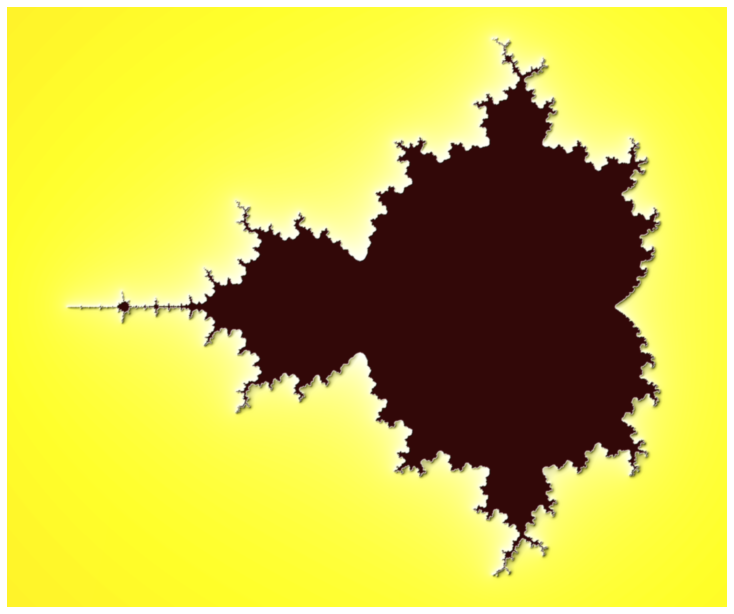

In [2]:
# -----------------------------------------------------------------------------
# From Numpy to Python
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np

def mandelbrot_numpy1(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    # اقتباس شده از https://www.ibm.com/developerworks/community/blogs/jfp/...
    #              .../entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:,None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N
  
def mandelbrot(xmin, xmax, ymin, ymax, xn, yn, itermax, horizon=2.0):
    # اقتباس شده از
    # https://thesamovar.wordpress.com/2009/03/22/fast-fractals-with-python-and-numpy/
    Xi, Yi = np.mgrid[0:xn, 0:yn]
    Xi, Yi = Xi.astype(np.uint32), Yi.astype(np.uint32)
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)[Xi]
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)[Yi]
    C = X + Y*1j
    N_ = np.zeros(C.shape, dtype=np.uint32)
    Z_ = np.zeros(C.shape, dtype=np.complex64)
    Xi.shape = Yi.shape = C.shape = xn*yn

    Z = np.zeros(C.shape, np.complex64)
    for i in range(itermax):
        if not len(Z): break
        np.multiply(Z, Z, Z)
        np.add(Z, C, Z)
        I = abs(Z) > horizon
        N_[Xi[I], Yi[I]] = i+1
        Z_[Xi[I], Yi[I]] = Z[I]
        np.logical_not(I, I)
        Z = Z[I]
        Xi, Yi = Xi[I], Yi[I]
        C = C[I]
    return Z_.T, N_.T

if __name__ == '__main__':
    from matplotlib import colors
    import matplotlib.pyplot as plt
    from utils.tools import timeit

    # معیار
    xmin, xmax, xn = -2.25, +0.75, int(3000/3)
    ymin, ymax, yn = -1.25, +1.25, int(2500/3)
    maxiter = 200
    timeit("mandelbrot_numpy1(xmin, xmax, ymin, ymax, xn, yn, maxiter)", globals())

    # تجسم
    xmin, xmax, xn = -2.25, +0.75, int(3000/2)
    ymin, ymax, yn = -1.25, +1.25, int(2500/2)
    maxiter = 20
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # شمارش نرمال شده
    M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z)))/np.log(2) + log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    light = colors.LightSource(azdeg=315, altdeg=10)
    plt.imshow(light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                           norm = colors.PowerNorm(0.3), blend_mode='hsv'),
               extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig("statics/img/08_08_02mandelbrot.png")
    plt.show()
